### AI-07: Estimation of genralization performance (汎化性能) of linear regression  

#### Import libraries  

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#### Read CSV file  

In [2]:
csv_in = 'reg100x50.csv'
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
display(df.head())

(100, 51)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,0.4,-0.3,2.4,-0.3,0.1,1.6,-0.9,-0.6,0.2,-0.3,...,1.1,-0.4,-0.8,0.3,2.0,-0.5,-1.3,0.1,0.5,1.4
1,0.7,0.1,-0.4,0.0,-0.1,0.8,-0.6,-0.0,-0.1,-0.1,...,0.2,-0.1,-1.1,-0.1,-1.3,0.7,0.1,0.6,1.0,15.2
2,1.4,0.2,-1.3,-0.7,-0.6,1.2,-0.1,2.3,0.7,0.1,...,1.2,-1.3,0.8,0.2,0.1,0.5,-0.6,0.8,0.1,10.4
3,-1.4,0.9,-0.2,-0.6,-0.2,2.1,0.3,0.7,0.8,1.0,...,-0.7,0.2,-0.3,-0.5,-0.1,1.8,-0.8,-0.3,1.4,1.6
4,0.8,0.2,-1.8,0.6,0.5,1.0,-0.8,2.5,-1.2,0.7,...,0.5,-1.0,0.6,-1.7,-0.8,-0.9,0.5,0.7,-1.3,-8.5


#### Separate explanatory variables and objective variable  

In [3]:
X = df.loc[:, 'x0':'x49']  # explanatory variables
y = df['y']  # objective variable

#### Divide data into train data and test data  

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.48,
                                                 shuffle=False)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(52, 50) (52,)
(48, 50) (48,)


#### Regression calculation for train data  
Number of variables: 50  
Number of train data: 52  
(Too much number of variables compared to data)  

In [5]:
X_train_c = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_c)
results = model.fit()

#### See the fitness (train data)  

In [6]:
print('Adj R2:', results.rsquared_adj)
y_train_pred = results.predict(X_train_c)
print(mean_squared_error(y_train_pred,y_train))

Adj R2: 0.9843338069503096
0.016799537102991174


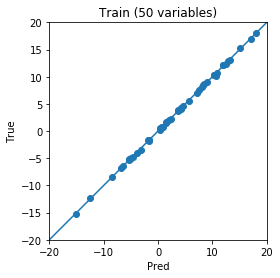

In [7]:
plt.title('Train (50 variables)')
plt.xlabel('Pred')
plt.ylabel('True')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.plot([-20,20],[-20,20])
plt.scatter(y_train_pred, y_train)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

**Near the perfect fit for train data ...**

#### Regression calculation for test data  

In [8]:
X_test_c = sm.add_constant(X_test)
y_test_pred = results.predict(X_test_c)
print(mean_squared_error(y_test_pred,y_test))

1381.990404104847


**So bad for test data ...**  

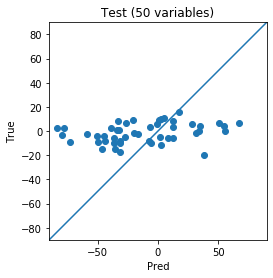

In [9]:
plt.title('Test (50 variables)')
plt.xlabel('Pred')
plt.ylabel('True')
plt.xlim(-90,90)
plt.ylim(-90,90)
plt.plot([-90,90],[-90,90])
plt.scatter(y_test_pred, y_test)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#### Using only half of explanatory variables  

In [10]:
X2_train = X_train.loc[:,'x0':'x24']
X2_test = X_test.loc[:,'x0':'x24']
print(X2_train.shape)
print(X2_test.shape)

(52, 25)
(48, 25)


#### Regression for train data  
Number of variables: 25 
Number of train data: 52  
(Too much number of variables compared to data)  

In [11]:
X2_train_c = sm.add_constant(X2_train)
model2 = sm.OLS(y_train, X2_train_c)
results2 = model2.fit()

#### See the fitness (train data)  

In [12]:
print('Adj R2:', results2.rsquared_adj)
y2_train_pred = results2.predict(X2_train_c)
print(mean_squared_error(y2_train_pred,y_train))

Adj R2: 0.2929839152081769
19.71226294040936


**Not good for train data compared to regression with 50 variables above**

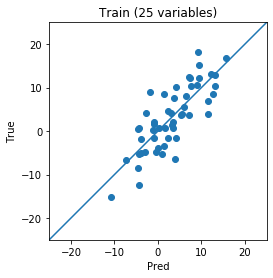

In [13]:
plt.title('Train (25 variables)')
plt.xlabel('Pred')
plt.ylabel('True')
plt.xlim(-25,25)
plt.ylim(-25,25)
plt.plot([-25,25],[-25,25])
plt.scatter(y2_train_pred, y_train)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#### Regression of test data  

In [14]:
X2_test_c = sm.add_constant(X2_test)
y2_test_pred = results2.predict(X2_test_c)
print(mean_squared_error(y2_test_pred,y_test))

59.608674193427625


**Not good for train data compared to regression with 50 variables above**

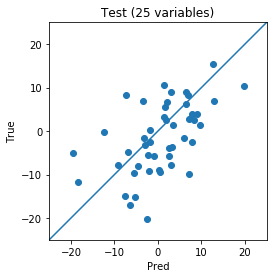

In [15]:
plt.title('Test (25 variables)')
plt.xlabel('Pred')
plt.ylabel('True')
plt.xlim(-25,25)
plt.ylim(-25,25)
plt.plot([-25,25],[-25,25])
plt.scatter(y2_test_pred, y_test)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()